In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Reading main datasets 

In [2]:
data_frames = {}
for file in os.listdir('./data/'):
     year = str(file).split('_')[-2]
     path = os.path.join('data',file)
     #path = os.path.join('data',file,file+'.csv')
     df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)
     print(path)
     data_frames['df_'+year] = df

data\dsc_fc_summed_spectra_2016_v01.csv
data\dsc_fc_summed_spectra_2017_v01.csv
data\dsc_fc_summed_spectra_2018_v01.csv
data\dsc_fc_summed_spectra_2019_v01.csv
data\dsc_fc_summed_spectra_2020_v01.csv
data\dsc_fc_summed_spectra_2021_v01.csv
data\dsc_fc_summed_spectra_2022_v01.csv
data\dsc_fc_summed_spectra_2023_v01.csv


In [3]:
df16, df17,df18,df19,df20,df21,df22 = data_frames['df_2016'], data_frames['df_2017'], data_frames['df_2018'], data_frames['df_2019'], data_frames['df_2020'], data_frames['df_2021'], data_frames['df_2022']
df_final = pd.concat([df16,df17,df18,df19,df20,df21,df22])

In [4]:
df_final.rename({0:'date',1:'x',2:'y',3:'z'},inplace = True,axis =1)

### Reading indexs dataframe 

In [5]:
ind = pd.read_csv('./kpg.txt', delimiter=' ')
ind_filter = ind[(ind['YYYY']>=2016) & (ind['YYYY']<=2022)]
ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)
ind_filter.head()

C:\Users\jlalu\AppData\Local\Temp\ipykernel_7384\2585190920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)


,YYYY,MM,DD,h,hh._m,days,days_m,Kp,ap,D
245448,2016,1,1,0.0,1.5,30681.000,30681.0625,6.000,80,1
245449,2016,1,1,3.0,4.5,30681.125,30681.1875,5.333,56,1
245450,2016,1,1,6.0,7.5,30681.250,30681.3125,5.000,48,1
245451,2016,1,1,9.0,10.5,30681.375,30681.4375,3.333,18,1
245452,2016,1,1,12.0,13.5,30681.500,30681.5625,1.667,6,1


## Checking nulls 

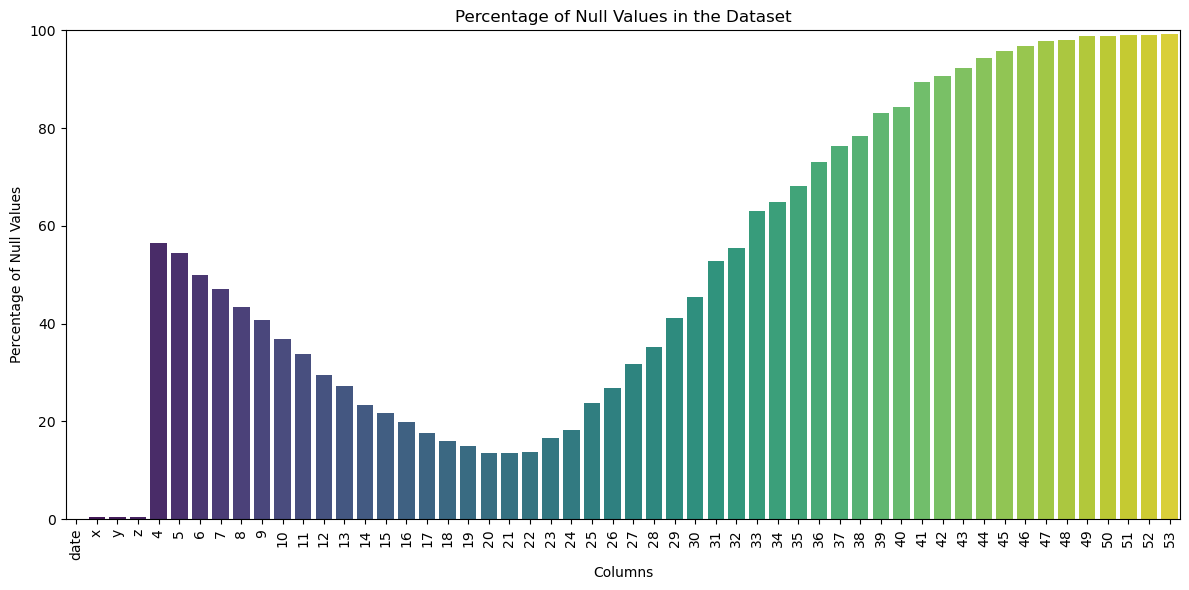

In [6]:
null_percentage = (df_final.isnull().sum() / len(df_final)) * 100

# Create a bar plot of null value percentages
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values in the Dataset")

# Set the y-axis scale from 0 to 100
plt.ylim(0, 100)

plt.tight_layout()

# Show the plot
plt.show()

In [7]:
for k in data_frames:
    num_nulls = data_frames[k].isnull().sum().sum()
    print(k,'has a total of',num_nulls/data_frames[k].shape[0],'% (',num_nulls,') nulls')

df_2016 has a total of 30.86239777213762 % ( 8755045 ) nulls
df_2017 has a total of 30.70994101978691 % ( 16141145 ) nulls
df_2018 has a total of 31.242830280011916 % ( 16781149 ) nulls
df_2019 has a total of 31.24171738451935 % ( 8007877 ) nulls
df_2020 has a total of 28.850437656305825 % ( 12920380 ) nulls
df_2021 has a total of 23.672530441400305 % ( 12442282 ) nulls
df_2022 has a total of 20.29900494672755 % ( 10669157 ) nulls
df_2023 has a total of 21.038439207650274 % ( 3696033 ) nulls


## Merging dataframes

In [8]:
# df_final['date'] = pd.to_datetime(df_final['date'])

# # Calculate the time interval (90 minutes) in seconds
# interval = pd.Timedelta(minutes=180).total_seconds()

# # Create a custom grouping column based on time intervals
# df_final['group'] = (df_final['date'].sub(df_final['date'].min()).dt.total_seconds() / interval).astype(int)

# # Group the DataFrame by the custom 'group' column and calculate the mean for each group
# df_grouped = df_final.groupby('group').mean()

# # Reset the index to have the 'group' as a regular column again if needed
# df_grouped.reset_index(inplace=True)

# # Display the resulting DataFrame
# df_grouped

In [9]:
def truncateHour(x):
    if x< 3:
        return 0
    elif x< 6:
        return 3
    elif x < 9:
        return 6
    elif x< 12:
        return 9
    elif x< 15:
        return 12
    elif x< 18:
        return 15
    elif x< 21:
        return 18
    else:
        return 21

In [10]:
df_final['YYYY'] = df_final['date'].dt.year
df_final['MM'] = df_final['date'].dt.month
df_final['DD'] = df_final['date'].dt.day
df_final['h'] = df_final['date'].dt.hour
df_final['h'] = df_final['h'].apply(truncateHour)

In [11]:
df_final.head(180)

,date,x,y,z,4,5,6,7,8,9,...,48,49,50,51,52,53,YYYY,MM,DD,h
0,2016-01-01 00:00:00,6.83609,-3.379340,-12.9205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
1,2016-01-01 00:01:00,6.76732,-3.301940,-12.9967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
2,2016-01-01 00:02:00,6.39107,-2.611730,-13.3271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
3,2016-01-01 00:03:00,6.44897,-2.615250,-13.3299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
4,2016-01-01 00:04:00,6.58758,-2.730820,-13.2361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2016-01-01 02:55:00,2.80987,0.072707,-13.1230,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
176,2016-01-01 02:56:00,2.90330,0.176012,-13.0506,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
177,2016-01-01 02:57:00,2.96329,0.333369,-13.1096,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
178,2016-01-01 02:58:00,2.83112,0.078324,-13.1435,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0


In [12]:
df_grouped = df_final.groupby(['YYYY','MM','DD','h']).mean()

C:\Users\jlalu\AppData\Local\Temp\ipykernel_7384\4020281617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_final.groupby(['YYYY','MM','DD','h']).mean()


In [13]:
df_grouped

x         y          z           4           5  \
YYYY MM DD h                                                           
2016 1  1  0   4.433160 -1.247880 -13.165854         NaN         NaN   
           3   3.448769 -3.864323  -8.984068  139.338250  108.341150   
           6   4.407694 -5.729229  -6.420560  143.819967  103.094027   
           9   3.758710 -6.973925   3.080465         NaN         NaN   
           12  6.514989 -6.250111  -0.786576  142.064460  102.750320   
...                 ...       ...        ...         ...         ...   
2022 12 31 9  -4.575782  1.086207   2.755094   20.038541    0.253126   
           12 -2.912565  0.545443  -1.746772   25.665688    0.231726   
           15 -3.569145  2.629413   0.167908   32.373597    0.231726   
           18 -4.063840  1.834405  -1.244176   24.981998    0.231726   
           21 -4.004869  1.863977  -0.416700   24.341184    0.231726   

                        6           7           8           9          10  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   131.678031  127.960636  124.528562  108.572063  108.378163   
           6   126.340200  129.495920  124.643217   96.828230   90.773630   
           9          NaN         NaN         NaN         NaN         NaN   
           12  127.700920  130.539498  124.235998   73.482044   79.054954   
...                   ...         ...         ...         ...         ...   
2022 12 31 9     2.232621   10.446358   12.015030    1.288711    3.908098   
           12    0.301693    7.798967   15.294495    0.234433    0.590340   
           15    0.533728   11.987406   18.079204    0.313125    4.004449   
           18    0.869348   12.322342   12.377256    0.253563    5.782082   
           21    0.497367    3.097159    9.419372    0.248380    1.114937   

               ...          44          45          46          47  \
YYYY MM DD h   ...                                                   
2016 1  1  0   ...         NaN         NaN         NaN         NaN   
           3   ...  161.363000  134.080562  151.425344  140.448156   
           6   ...  163.193200  131.601167  151.214300  144.231933   
           9   ...         NaN         NaN         NaN         NaN   
           12  ...  162.297380  133.708920  152.504700  142.948180   
...            ...         ...         ...         ...         ...   
2022 12 31 9   ...         NaN         NaN         NaN         NaN   
           12  ...  372.433667  295.602368  362.085000         NaN   
           15  ...  351.656905  288.231412  386.202500         NaN   
           18  ...  316.262016  291.814545  388.993750         NaN   
           21  ...  339.274714  277.562000         NaN         NaN   

                       48          49          50          51          52  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   132.193750  151.046906  151.407406  134.467309  162.754562   
           6   129.541733  147.492067  156.671133  137.356233  158.362867   
           9          NaN         NaN         NaN         NaN         NaN   
           12  129.320420  148.748020  156.235200  136.425440  159.369940   
...                   ...         ...         ...         ...         ...   
2022 12 31 9          NaN         NaN         NaN         NaN         NaN   
           12         NaN         NaN         NaN         NaN         NaN   
           15         NaN         NaN         NaN         NaN         NaN   
           18         NaN         NaN         NaN         NaN         NaN   
           21         NaN         NaN         NaN         NaN         NaN   

                       53  
YYYY MM DD h               
2016 1  1  0          NaN  
           3   142.775667  
           6   144.435267  
           9          NaN  
  

In [14]:
merged_df = pd.merge(df_grouped, ind_filter, on=['YYYY', 'DD', 'MM', 'h'], how='inner')
merged_df.head()

,YYYY,DD,MM,h,x,y,z,4,5,6,...,50,51,52,53,hh._m,days,days_m,Kp,ap,D
0,2016,1,1,0,4.433160,-1.247880,-13.165854,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,30681.000,30681.0625,6.000,80,1
1,2016,1,1,3,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,...,151.407406,134.467309,162.754562,142.775667,4.5,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,...,156.671133,137.356233,158.362867,144.435267,7.5,30681.250,30681.3125,5.000,48,1
3,2016,1,1,9,3.758710,-6.973925,3.080465,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,30681.375,30681.4375,3.333,18,1
4,2016,1,1,12,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,...,156.235200,136.425440,159.369940,145.061380,13.5,30681.500,30681.5625,1.667,6,1


In [15]:
merged_df.head()

,YYYY,DD,MM,h,x,y,z,4,5,6,...,50,51,52,53,hh._m,days,days_m,Kp,ap,D
0,2016,1,1,0,4.433160,-1.247880,-13.165854,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,30681.000,30681.0625,6.000,80,1
1,2016,1,1,3,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,...,151.407406,134.467309,162.754562,142.775667,4.5,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,...,156.671133,137.356233,158.362867,144.435267,7.5,30681.250,30681.3125,5.000,48,1
3,2016,1,1,9,3.758710,-6.973925,3.080465,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,30681.375,30681.4375,3.333,18,1
4,2016,1,1,12,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,...,156.235200,136.425440,159.369940,145.061380,13.5,30681.500,30681.5625,1.667,6,1


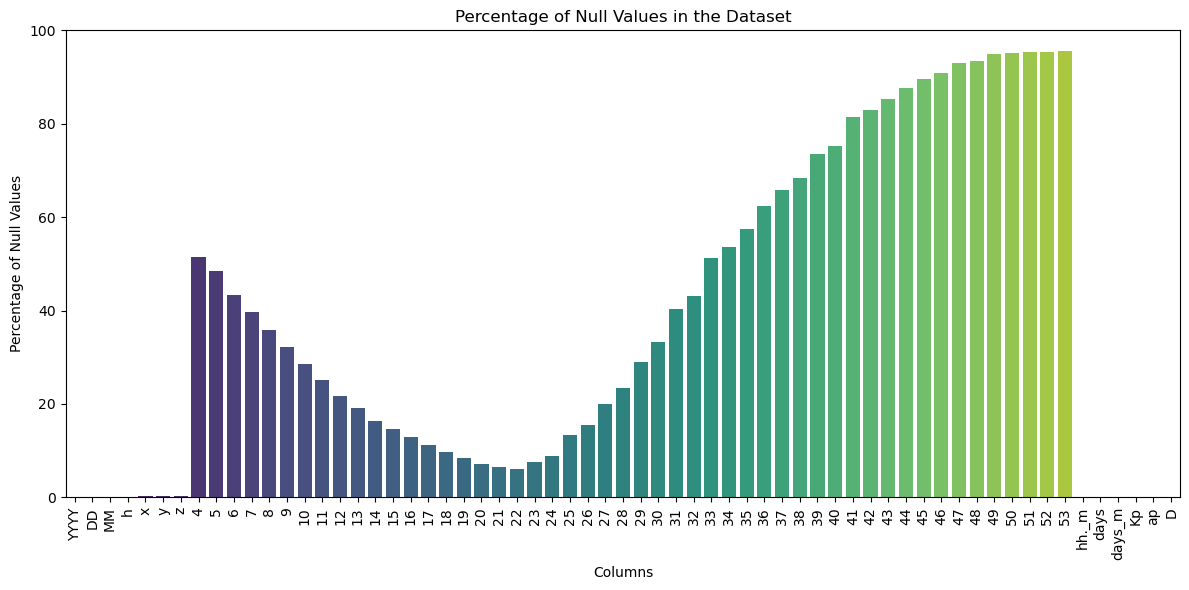

In [16]:
null_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

# Create a bar plot of null value percentages
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values in the Dataset")

# Set the y-axis scale from 0 to 100
plt.ylim(0, 100)

plt.tight_layout()

# Show the plot
plt.show()

In [17]:
filtered_df = merged_df.drop(merged_df.columns[37:58],axis=1)

In [18]:
from sklearn.impute import KNNImputer
inputer = KNNImputer(n_neighbors=4)

In [19]:
filtered_df.columns = filtered_df.columns.astype(str)
columns_with_missing = filtered_df.columns[filtered_df.isnull().any()]

df_missing = filtered_df[columns_with_missing]
df_non_missing = filtered_df.drop(columns=columns_with_missing)

# Initialize the KNNImputer (you can specify the number of neighbors 'n_neighbors')
imputer = KNNImputer(n_neighbors=4)

# Fit the imputer on non-missing data and transform the missing data
df_missing_imputed = pd.DataFrame(imputer.fit_transform(df_non_missing), columns=df_non_missing.columns)

# Combine the imputed data with the non-missing data
df_imputed = pd.concat([df_missing_imputed, df_missing], axis=1)

In [20]:
merged_df.columns

Index([  'YYYY',     'DD',     'MM',      'h',      'x',      'y',      'z',
              4,        5,        6,        7,        8,        9,       10,
             11,       12,       13,       14,       15,       16,       17,
             18,       19,       20,       21,       22,       23,       24,
             25,       26,       27,       28,       29,       30,       31,
             32,       33,       34,       35,       36,       37,       38,
             39,       40,       41,       42,       43,       44,       45,
             46,       47,       48,       49,       50,       51,       52,
             53,  'hh._m',   'days', 'days_m',     'Kp',     'ap',      'D'],
      dtype='object')

In [36]:
filte = filtered_df.drop(['hh._m','days','days_m','YYYY','DD','MM','h','D'],axis=1)

KeyError: "['hh._m'] not found in axis"

In [22]:
merged_df

,YYYY,DD,MM,h,x,y,z,4,5,6,...,50,51,52,53,hh._m,days,days_m,Kp,ap,D
0,2016,1,1,0,4.433160,-1.247880,-13.165854,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,30681.000,30681.0625,6.000,80,1
1,2016,1,1,3,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,...,151.407406,134.467309,162.754562,142.775667,4.5,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,...,156.671133,137.356233,158.362867,144.435267,7.5,30681.250,30681.3125,5.000,48,1
3,2016,1,1,9,3.758710,-6.973925,3.080465,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,30681.375,30681.4375,3.333,18,1
4,2016,1,1,12,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,...,156.235200,136.425440,159.369940,145.061380,13.5,30681.500,30681.5625,1.667,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,2022,31,12,9,-4.575782,1.086207,2.755094,20.038541,0.253126,2.232621,...,NaN,NaN,NaN,NaN,10.5,33237.375,33237.4375,1.667,6,2
17164,2022,31,12,12,-2.912565,0.545443,-1.746772,25.665688,0.231726,0.301693,...,NaN,NaN,NaN,NaN,13.5,33237.500,33237.5625,3.000,15,2
17165,2022,31,12,15,-3.569145,2.629413,0.167908,32.373597,0.231726,0.533728,...,NaN,NaN,NaN,NaN,16.5,33237.625,33237.6875,2.667,12,2
17166,2022,31,12,18,-4.063840,1.834405,-1.244176,24.981998,0.231726,0.869348,...,NaN,NaN,NaN,NaN,19.5,33237.750,33237.8125,3.333,18,2


In [37]:
non_na = filtered_df.dropna()
non_na.head()

,YYYY,DD,MM,h,x,y,z,4,5,6,...,29,30,31,32,33,days,days_m,Kp,ap,D
1,2016,1,1,3,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,...,133.417875,156.115273,157.808188,151.744812,155.335281,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,...,129.626667,155.001633,154.731300,146.782767,152.727733,30681.250,30681.3125,5.000,48,1
4,2016,1,1,12,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,...,132.570392,151.837784,149.355490,147.432392,154.934608,30681.500,30681.5625,1.667,6,1
5,2016,1,1,15,5.987184,-5.670084,0.123970,143.002722,103.196814,127.037270,...,132.425644,151.847561,151.694983,149.333400,154.582711,30681.625,30681.6875,1.000,4,1
6,2016,1,1,18,4.177648,-1.696730,-0.348509,132.232489,109.701154,141.846061,...,139.532894,161.093950,160.100139,156.799294,164.570422,30681.750,30681.8125,2.000,7,1


In [38]:
non_na.shape

(3770, 42)

In [67]:
X1 = non_na[["x", "y", "z", "ap", "Kp"]]
X2 = non_na.iloc[:,7:10]
X = pd.concat((X2,X1), axis = 1).values

In [75]:
X[7]

array([ 1.16798806,  1.72225325,  0.85126225, -0.65459235, -0.07558953,
        0.0141936 , -0.16276857,  0.21205851])

In [68]:
from sklearn.preprocessing import StandardScaler
X = sc_X.fit_transform(X)

In [167]:
X_train = list()
y_train = list()
for i in range(40,len(X)):
    X_train.append(X[i-40:i,:])
    y_train.append(X[i,7])

In [83]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [135]:
X_train  = np.reshape(X_train, (3016, 40, 8,1,1))

In [136]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, ConvLSTM2D, BatchNormalization, Flatten, RepeatVector, Reshape, TimeDistributed

In [166]:
classifier = Sequential()
classifier.add(Input(shape = (X_train.shape[1], X_train.shape[2],1,1)))
classifier.add(ConvLSTM2D(filters=64, kernel_size = (10,1), 
                         padding="same", return_sequences=False))
classifier.add(Dropout(rate = 0.3))
classifier.add(BatchNormalization())
classifier.add(Flatten())
classifier.add(RepeatVector(4))
classifier.add(Reshape((4,8,1,64)))
classifier.add(ConvLSTM2D(filters=64, kernel_size = (5,1), 
                         padding="same", return_sequences=False))
classifier.add(TimeDistributed(Dense(units = 1, kernel_initializer= "uniform",
                    activation = "relu")))
classifier.add(Dense(units = 1, kernel_initializer= "uniform",
                    activation = "linear"))
classifier.compile(optimizer="adam", loss = "mean_squared_error",
                  metrics=["accuracy"])

In [158]:
history = classifier.fit(X_train, y_train, epochs = 10, batch_size = 32, 
              validation_split=0.2)

Epoch 1/10
76/76 [==============================] - 42s 556ms/step - loss: 0.9879 - accuracy: 0.0000e+00 - val_loss: 1.0198 - val_accuracy: 0.0000e+00
Epoch 2/10
76/76 [==============================] - 44s 579ms/step - loss: 0.9878 - accuracy: 0.0000e+00 - val_loss: 1.0203 - val_accuracy: 0.0000e+00
Epoch 3/10
76/76 [==============================] - 43s 562ms/step - loss: 0.9879 - accuracy: 0.0000e+00 - val_loss: 1.0205 - val_accuracy: 0.0000e+00
Epoch 4/10
76/76 [==============================] - 43s 570ms/step - loss: 0.9878 - accuracy: 0.0000e+00 - val_loss: 1.0199 - val_accuracy: 0.0000e+00
Epoch 5/10
76/76 [==============================] - 43s 564ms/step - loss: 0.9877 - accuracy: 0.0000e+00 - val_loss: 1.0200 - val_accuracy: 0.0000e+00
Epoch 6/10
76/76 [==============================] - 42s 558ms/step - loss: 0.9879 - accuracy: 0.0000e+00 - val_loss: 1.0206 - val_accuracy: 0.0000e+00
Epoch 7/10
76/76 [==============================] - 43s 568ms/step - loss: 0.9879 - accuracy: 

In [164]:
X_test = X[0:40,:]
X_test = np.reshape(X_test,(1, 40, 8,1,1))
y_pred = classifier.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [165]:
y_pred

array([[[[0.04126766]],

        [[0.04126766]],

        [[0.04126766]],

        [[0.04126766]],

        [[0.04126766]],

        [[0.04126766]],

        [[0.04126766]],

        [[0.04126766]]]], dtype=float32)

In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [184]:
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
print(mse, mae)

37.99184889795112 3.5751989706757845


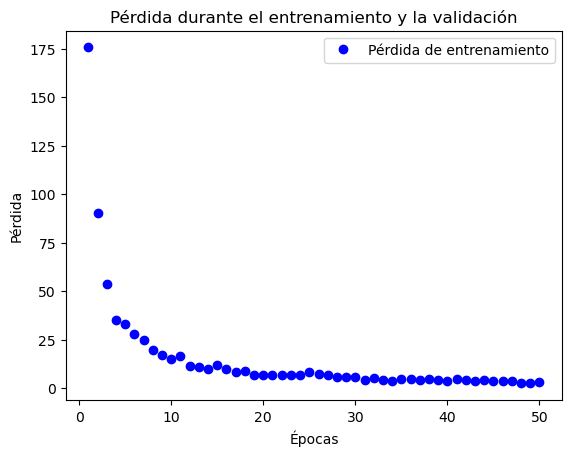

In [185]:
loss = history.history['loss']

# Crear una gráfica de la pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


In [190]:
((y>=102.5) == True).sum()

6

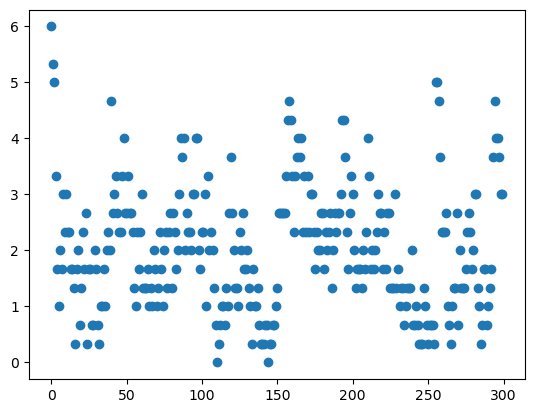

In [211]:
numeros = list(range(0, len(merged_df["Kp"])))
plt.scatter(numeros[0:300],  merged_df["Kp"][0:300])


In [195]:
merged_df["days"][0:300]

0      30681.000
1      30681.125
2      30681.250
3      30681.375
4      30681.500
         ...    
295    30886.875
296    30887.000
297    30887.125
298    30887.250
299    30887.375
Name: days, Length: 300, dtype: float64